# MuCoST for Mouse Brain datasets of 10X Visium

# import MuCoST

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from MuCoST.mucost import training_model
from MuCoST.utils import mclust
from MuCoST.config import set_arg

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# hyperparameter setting

In [2]:
opt = set_arg()
arg = opt.parse_args(['--mode_his', 'noh'])
arg.n_domain=22
arg.temp=0.05
arg.radius=300
arg

Namespace(seed=2023, latent_dim=50, epoch=1000, lr=0.001, weight_decay=0.0, log_step=10, drop_feat_p=0.2, flow='source_to_target', radius=300, rknn=6, knn=6, n_domain=22, temp=0.05, n_refine=25, mode_his='noh', mode_rknn='rknn')

## reading data

In [3]:
input_dir = os.path.join('Data/AMBS')
adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
# img=cv2.imread(input_dir + "/spatial/image.tif")
# adata.uns['image']=img
adata

/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2903 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

## Showing ground truth

In [4]:
# Ann_df = pd.read_csv(os.path.join('Data/2-Mouse_Brain_Anterior/', 'metadata.tsv'), sep='\t', header=0, index_col=0)
# adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'ground_truth']
# plt.rcParams["figure.figsize"] = (5, 5)
# sc.pl.spatial(adata, img_key="hires", color=["Ground Truth"])

## training model

Average spatial edge: 5.849810540819842
Average feature edge: 6.0


  0%|          | 0/1000 [00:00<?, ?it/s]

EP[ 100]: loss=0.7739.
EP[ 200]: loss=0.7314.
EP[ 300]: loss=0.7167.
EP[ 400]: loss=0.7077.
EP[ 500]: loss=0.7019.
EP[ 600]: loss=0.6978.
EP[ 700]: loss=0.6978.
EP[ 800]: loss=0.6922.
EP[ 900]: loss=0.6937.
EP[1000]: loss=0.6891.


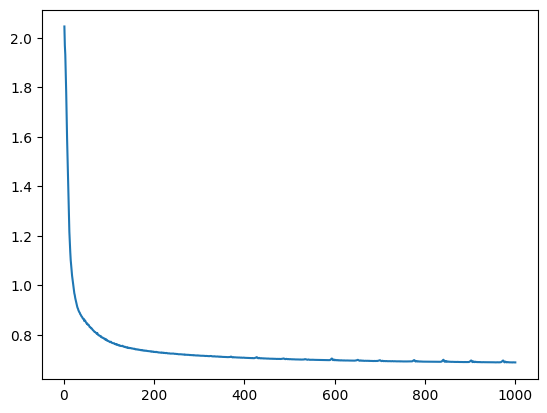

In [5]:
training_model(adata, arg)

## clustering with muclust

In [6]:
adata = mclust(adata, arg, refine=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


## computing ARI

In [7]:
# adata = adata[~pd.isnull(adata.obs['Ground Truth'])]
# obs_df = adata.obs.dropna()
# ARI = adjusted_rand_score(obs_df['mclust'], obs_df['Ground Truth'])
# print('Adjusted rand index = %.4f' %ARI)

## spatial architectures

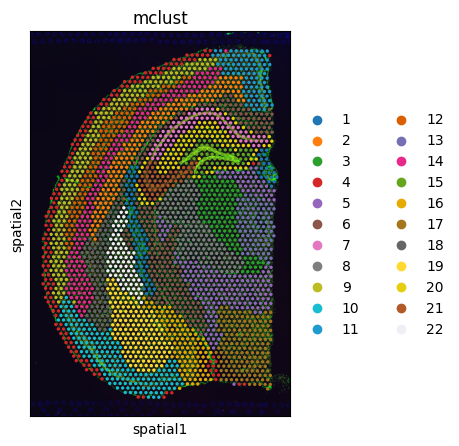

In [8]:
default_colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f',
                  '#bcbd22','#17becf','#1f9bcf','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02',
                  '#a6761d','#666666','#ffd92f','#e5cf0d','#b15928','#f1eef6','#053061','#1967be',
                  '#d1dbbd','#a6cee3','#33a02c','#b2df8a','#fb9a99','#fdbf6f','#ff7f00','#cab2d6',
                  '#6a3d9a','#b15928']
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"],palette=default_colors)

In [9]:
adata.obsm['spatial'][:,1] = -1*adata.obsm['spatial'][:,1]

/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'MuCoST'}, xlabel='spatial1', ylabel='spatial2'>

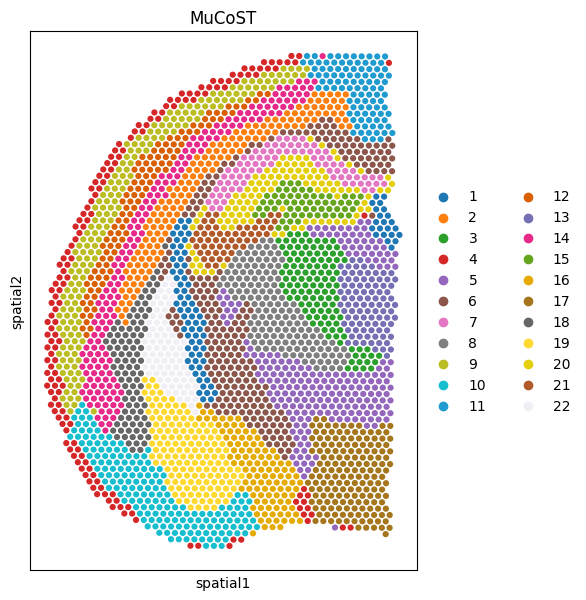

In [10]:
# adata.obsm["spatial"] = adata.obsm["spatial"] * (-1)
import seaborn as sns
rgb_values = sns.color_palette("tab20", len(adata.obs['mclust'].unique()))
color_fine = dict(zip(list(adata.obs['mclust'].unique()), rgb_values))

plt.rcParams["figure.figsize"] = (5, 7)
sc.pl.embedding(adata, basis="spatial",palette=default_colors, color="mclust",s=80, show=False, title='MuCoST')

/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


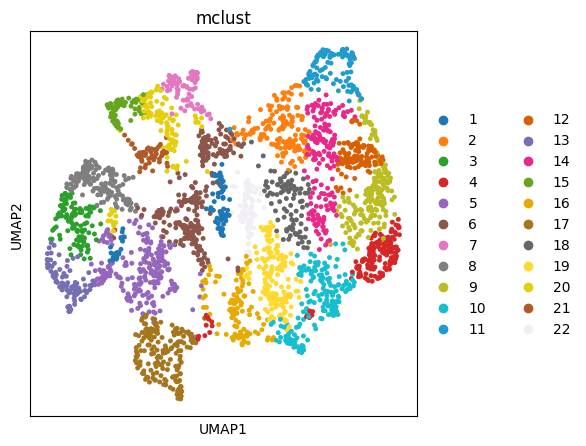

In [11]:
sc.pp.neighbors(adata, use_rep='MuCoST')
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(adata, color="mclust",legend_fontsize=10, size=50,legend_fontoutline=2)